# Data Inspection

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import statsmodels.api as sm
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from tensorflow.keras import regularizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
# fix tensorflow gpu problems
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

### 1.Data Loading & Inspection

In [4]:

file_path = "D:\\4DATA\SEMESTER2\PI\DATASET\mm-5G.csv"   
dataset = pd.read_csv(file_path, sep=',')



<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Souhayl\AppData\Local\Temp\ipykernel_2528\3429372072.py:1: SyntaxWarning: invalid escape sequence '\S'
  file_path = "D:\\4DATA\SEMESTER2\PI\DATASET\mm-5G.csv"


In [5]:
dataset.head()

,run_num,seq_num,abstractSignalStr,latitude,longitude,movingSpeed,compassDirection,nrStatus,lte_rssi,lte_rsrp,lte_rsrq,lte_rssnr,nr_ssRsrp,nr_ssRsrq,nr_ssSinr,Throughput,mobility_mode,trajectory_direction,tower_id
0,1,1.0,2,44.975314,-93.259316,0.094889,150,NOT_RESTRICTED,-61.0,-94,-14.0,2.147484e+09,NaN,NaN,NaN,78,driving,CW,16
1,1,2.0,2,44.975311,-93.259311,0.876634,117,NOT_RESTRICTED,-61.0,-94,-14.0,2.147484e+09,NaN,NaN,NaN,117,driving,CW,16
2,1,3.0,2,44.975305,-93.259292,2.225798,113,NOT_RESTRICTED,-61.0,-94,-14.0,2.147484e+09,NaN,NaN,NaN,110,driving,CW,16
3,1,4.0,2,44.975293,-93.259258,3.180726,114,NOT_RESTRICTED,-59.0,-95,-16.0,2.147484e+09,NaN,NaN,NaN,108,driving,CW,16
4,1,5.0,2,44.975278,-93.259214,3.751234,115,NOT_RESTRICTED,-59.0,-95,-16.0,2.147484e+09,NaN,NaN,NaN,100,driving,CW,16


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68118 entries, 0 to 68117
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   run_num               68118 non-null  int64  
 1   seq_num               68118 non-null  float64
 2   abstractSignalStr     68118 non-null  int64  
 3   latitude              68118 non-null  float64
 4   longitude             68118 non-null  float64
 5   movingSpeed           68118 non-null  float64
 6   compassDirection      68118 non-null  int64  
 7   nrStatus              68118 non-null  object 
 8   lte_rssi              65137 non-null  float64
 9   lte_rsrp              68118 non-null  int64  
 10  lte_rsrq              65137 non-null  float64
 11  lte_rssnr             65137 non-null  float64
 12  nr_ssRsrp             51990 non-null  float64
 13  nr_ssRsrq             51990 non-null  float64
 14  nr_ssSinr             51990 non-null  float64
 15  Throughput         

Summary : 

Total entries: 68,118 with 19 columns (numeric & categorical).

Missing values: LTE (lte_rssi, lte_rsrq, lte_rssnr ~3,000 missing), 5G (nr_ssRsrp, nr_ssRsrq, nr_ssSinr ~16,000 missing).

Categorical columns: nrStatus, mobility_mode, trajectory_direction.

Numeric columns: Signal strength (LTE & 5G), speed, direction, throughput.

Key metric: Throughput is fully available, but LTE/5G signal gaps need handling

In [7]:
dataset.describe()

,run_num,seq_num,abstractSignalStr,latitude,longitude,movingSpeed,compassDirection,lte_rssi,lte_rsrp,lte_rsrq,lte_rssnr,nr_ssRsrp,nr_ssRsrq,nr_ssSinr,Throughput,tower_id
count,68118.000000,68118.000000,68118.000000,68118.000000,68118.000000,6.811800e+04,68118.000000,65137.000000,68118.000000,65137.000000,6.513700e+04,51990.000000,5.199000e+04,51990.000000,68118.000000,68118.000000
mean,57.913635,351.161910,3.934628,44.975189,-93.261352,1.862048e+00,177.688731,-55.456054,-83.705849,-12.571626,2.147484e+09,-89.070917,3.696859e+07,11.653530,520.665184,13.522681
std,34.313850,233.902358,0.927087,0.000987,0.001205,1.857597e+00,101.751416,7.799077,18.040661,3.498149,0.000000e+00,8.366524,2.793283e+08,6.323822,461.941862,5.694595
min,1.000000,1.000000,1.000000,44.973256,-93.263754,6.212357e-12,0.000000,-79.000000,-140.000000,-20.000000,2.147484e+09,-139.000000,-2.000000e+01,-20.000000,0.000000,1.000000
25%,28.000000,145.000000,3.000000,44.974377,-93.262263,1.236203e+00,114.000000,-57.000000,-90.000000,-15.000000,2.147484e+09,-94.000000,-1.200000e+01,8.000000,109.000000,11.000000
50%,53.000000,318.000000,4.000000,44.975318,-93.261321,1.354527e+00,184.000000,-51.000000,-79.000000,-12.000000,2.147484e+09,-89.000000,-1.200000e+01,14.000000,424.000000,16.000000
75%,88.000000,555.000000,5.000000,44.975978,-93.260409,1.464417e+00,295.000000,-51.000000,-75.000000,-10.000000,2.147484e+09,-83.000000,-1.200000e+01,17.000000,867.000000,16.000000
max,118.000000,800.000000,5.000000,44.976964,-93.258991,1.405988e+01,360.000000,-51.000000,-44.000000,-5.000000,2.147484e+09,-68.000000,2.147484e+09,30.000000,1920.000000,24.000000


## Lets visualise some runs 

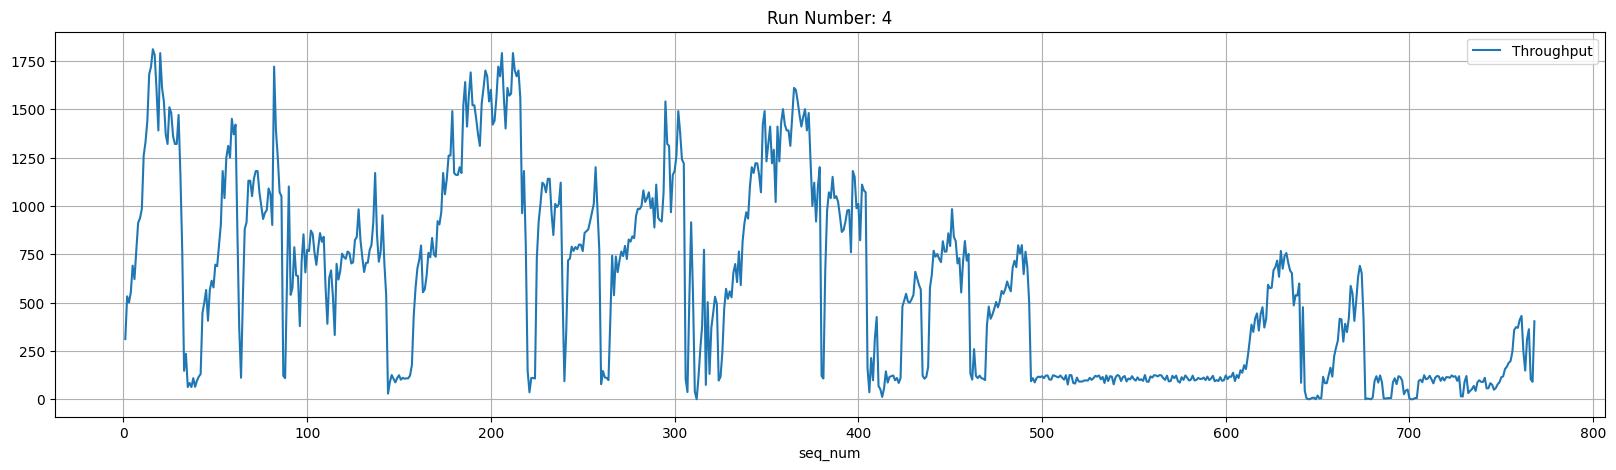

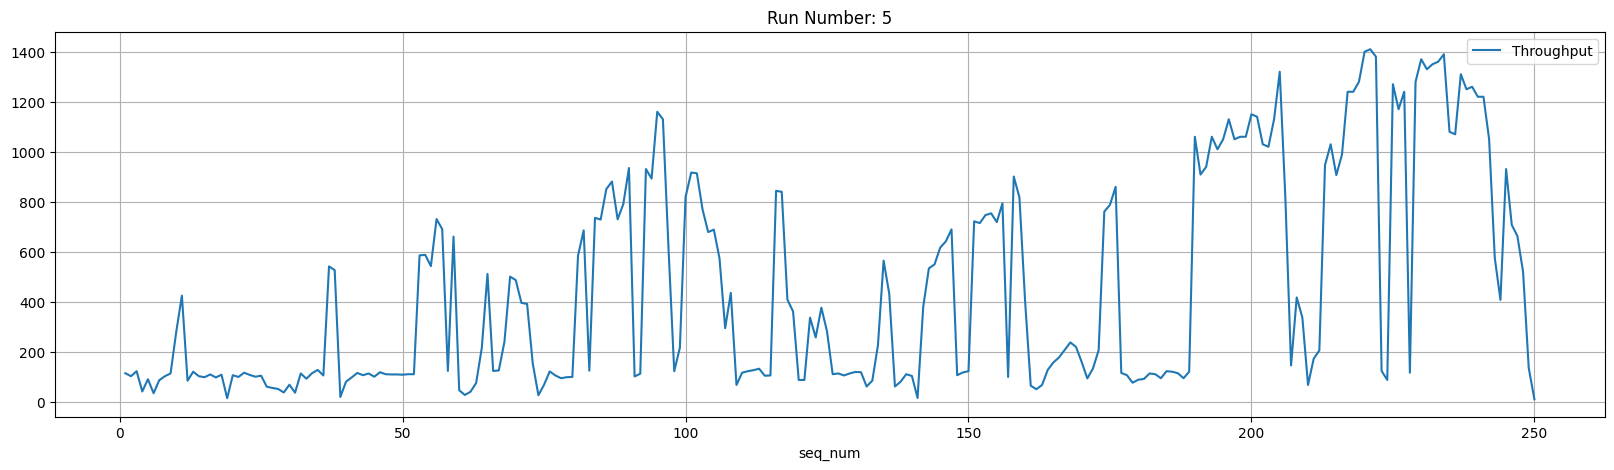

In [8]:
for run_number in range(4, 6):
    run = dataset.loc[(dataset['run_num'] == run_number)][["seq_num", "Throughput"]]
    run = run.set_index("seq_num")
    ax = run.plot(figsize=(20, 5), x_compat=True, grid=True)
    ax.set_title(f"Run Number: {run_number}")

## Box plot for run 1 and 118

C:\Users\Souhayl\AppData\Local\Temp\ipykernel_2528\2755637967.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([global_throughput, run_118_throughput], labels=['Global Throughput', 'Run 118 Throughput'])


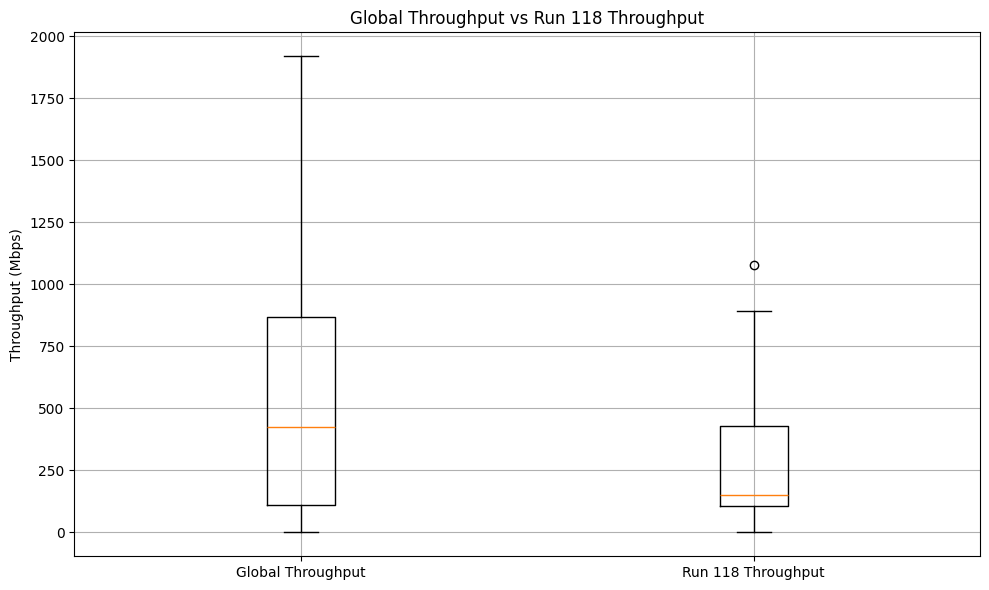

In [9]:

# Filter dataset for Run 118
run_118_data = dataset[dataset["run_num"] == 118]
# Global throughput and throughput for run 118
global_throughput = dataset['Throughput']
run_118_throughput = run_118_data['Throughput']

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot the global throughput and run 118 throughput data
plt.boxplot([global_throughput, run_118_throughput], labels=['Global Throughput', 'Run 118 Throughput'])

# Add title and labels
plt.title('Global Throughput vs Run 118 Throughput')
plt.ylabel('Throughput (Mbps)')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


The first box (on the left) represents the global throughput across all runs.
The median value (represented by the orange line) is around 500 Mbps.
The box shows the interquartile range (IQR), where most of the data lies, ranging between about 250 Mbps and 750 Mbps. This indicates that the majority of the throughput values across all runs fall within this range.


## Throughput distribution

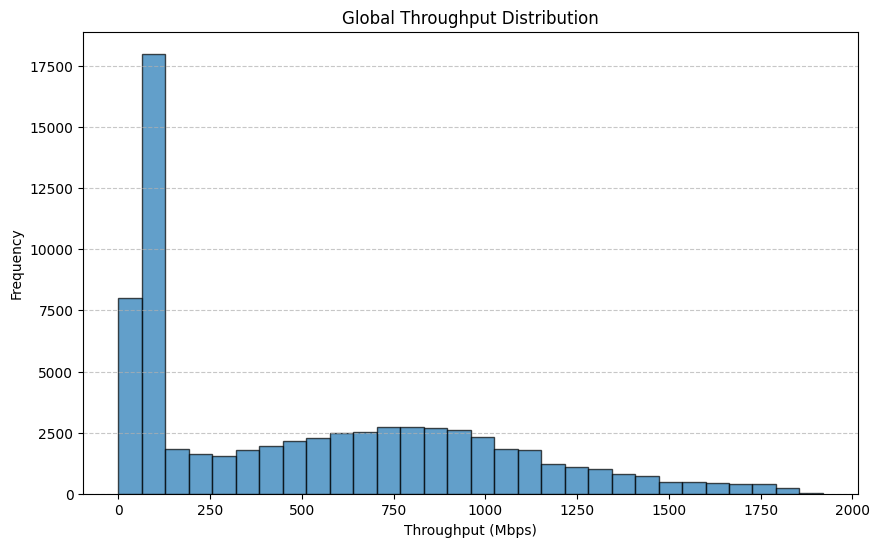

In [10]:
# Plot histogram of global throughput distribution
plt.figure(figsize=(10, 6))
plt.hist(dataset['Throughput'], bins=30, edgecolor="black", alpha=0.7)

plt.xlabel("Throughput (Mbps)")
plt.ylabel("Frequency")
plt.title("Global Throughput Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2- Data preparation

## 2.1-Missing values handling

In [11]:
print("\nMissing Values:")
dataset.isnull().sum()


Missing Values:


run_num                     0
seq_num                     0
abstractSignalStr           0
latitude                    0
longitude                   0
movingSpeed                 0
compassDirection            0
nrStatus                    0
lte_rssi                 2981
lte_rsrp                    0
lte_rsrq                 2981
lte_rssnr                2981
nr_ssRsrp               16128
nr_ssRsrq               16128
nr_ssSinr               16128
Throughput                  0
mobility_mode               0
trajectory_direction        0
tower_id                    0
dtype: int64

Replace Missing Values with Zero (First Script)
Why? This assumes that missing values mean no signal was detected.
How? Replace all NaN values in LTE (lte_rssi, lte_rsrq, lte_rssnr) and 5G (nr_ssRsrp, nr_ssRsrq, nr_ssSinr) with 0.

In [12]:
columns_to_fill = ["lte_rssi", "lte_rsrq", "lte_rssnr", "nr_ssRsrp", "nr_ssRsrq", "nr_ssSinr"]

# Replace missing values with 0
dataset[columns_to_fill] = dataset[columns_to_fill].fillna(0)

# Verify
print(dataset[columns_to_fill].isna().sum())  # Should print all zeros


lte_rssi     0
lte_rsrq     0
lte_rssnr    0
nr_ssRsrp    0
nr_ssRsrq    0
nr_ssSinr    0
dtype: int64


### 2.2 Encoding non numeric features for further analysis

In [13]:
# dataset est le DataFrame contenant les données à encoder

# 1. Encoder la colonne 'trajectory_direction'
directions = list(dataset['trajectory_direction'].unique())
print('Directions:', directions)
enc = preprocessing.LabelEncoder()
dataset['trajectory_direction'] = enc.fit_transform(dataset['trajectory_direction'].values.ravel())

# 2. Encoder la colonne 'mobility_mode'
mobility_mode = list(dataset['mobility_mode'].unique())
print('Mobility mode:', mobility_mode)
enc = preprocessing.LabelEncoder()
dataset['mobility_mode'] = enc.fit_transform(dataset['mobility_mode'].values.ravel())

# 3. Encoder la colonne 'nrStatus'
nrStatus = list(dataset['nrStatus'].unique())
print('nrStatus:', nrStatus)
enc = preprocessing.LabelEncoder()
dataset['nrStatus'] = enc.fit_transform(dataset['nrStatus'].values.ravel())

# Afficher les premières lignes du DataFrame pour vérifier
dataset.head()


Directions: ['CW', 'ACW']
Mobility mode: ['driving', 'walking']
nrStatus: ['NOT_RESTRICTED', 'CONNECTED', 'NONE']


,run_num,seq_num,abstractSignalStr,latitude,longitude,movingSpeed,compassDirection,nrStatus,lte_rssi,lte_rsrp,lte_rsrq,lte_rssnr,nr_ssRsrp,nr_ssRsrq,nr_ssSinr,Throughput,mobility_mode,trajectory_direction,tower_id
0,1,1.0,2,44.975314,-93.259316,0.094889,150,2,-61.0,-94,-14.0,2.147484e+09,0.0,0.0,0.0,78,0,1,16
1,1,2.0,2,44.975311,-93.259311,0.876634,117,2,-61.0,-94,-14.0,2.147484e+09,0.0,0.0,0.0,117,0,1,16
2,1,3.0,2,44.975305,-93.259292,2.225798,113,2,-61.0,-94,-14.0,2.147484e+09,0.0,0.0,0.0,110,0,1,16
3,1,4.0,2,44.975293,-93.259258,3.180726,114,2,-59.0,-95,-16.0,2.147484e+09,0.0,0.0,0.0,108,0,1,16
4,1,5.0,2,44.975278,-93.259214,3.751234,115,2,-59.0,-95,-16.0,2.147484e+09,0.0,0.0,0.0,100,0,1,16


## 2.3 Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Define columns to scale (excluding categorical variables)
columns_to_scale = ["latitude", "longitude", "movingSpeed", "lte_rssi", "lte_rsrp", "lte_rsrq", 
                    "lte_rssnr", "nr_ssRsrp", "nr_ssRsrq", "nr_ssSinr", "Throughput"]

# Initialize scaler
scaler = MinMaxScaler()

# Apply scaling
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

# Verify scaling results
print(dataset[columns_to_scale].describe())  # Should be between 0 and 1


           latitude     longitude   movingSpeed      lte_rssi      lte_rsrp  \
count  68118.000000  68118.000000  68118.000000  68118.000000  68118.000000   
mean       0.521373      0.504226      0.132437      0.328745      0.586397   
std        0.266101      0.253046      0.132120      0.173034      0.187924   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.302473      0.312947      0.087924      0.278481      0.520833   
50%        0.556252      0.510875      0.096340      0.354430      0.635417   
75%        0.734213      0.702169      0.104156      0.354430      0.677083   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           lte_rsrq     lte_rssnr     nr_ssRsrp     nr_ssRsrq     nr_ssSinr  \
count  68118.000000  68118.000000  68118.000000  6.811800e+04  68118.000000   
mean       0.398927      0.956238      0.510921  1.313897e-02      0.577887   
std        0.213982      0.204567      0.277432  1.

After handling missing values, we need to scale the dataset to ensure that all features are on a similar range. This helps improve model performance by preventing large-value features from dominating smaller ones.

## Lets view some correlations

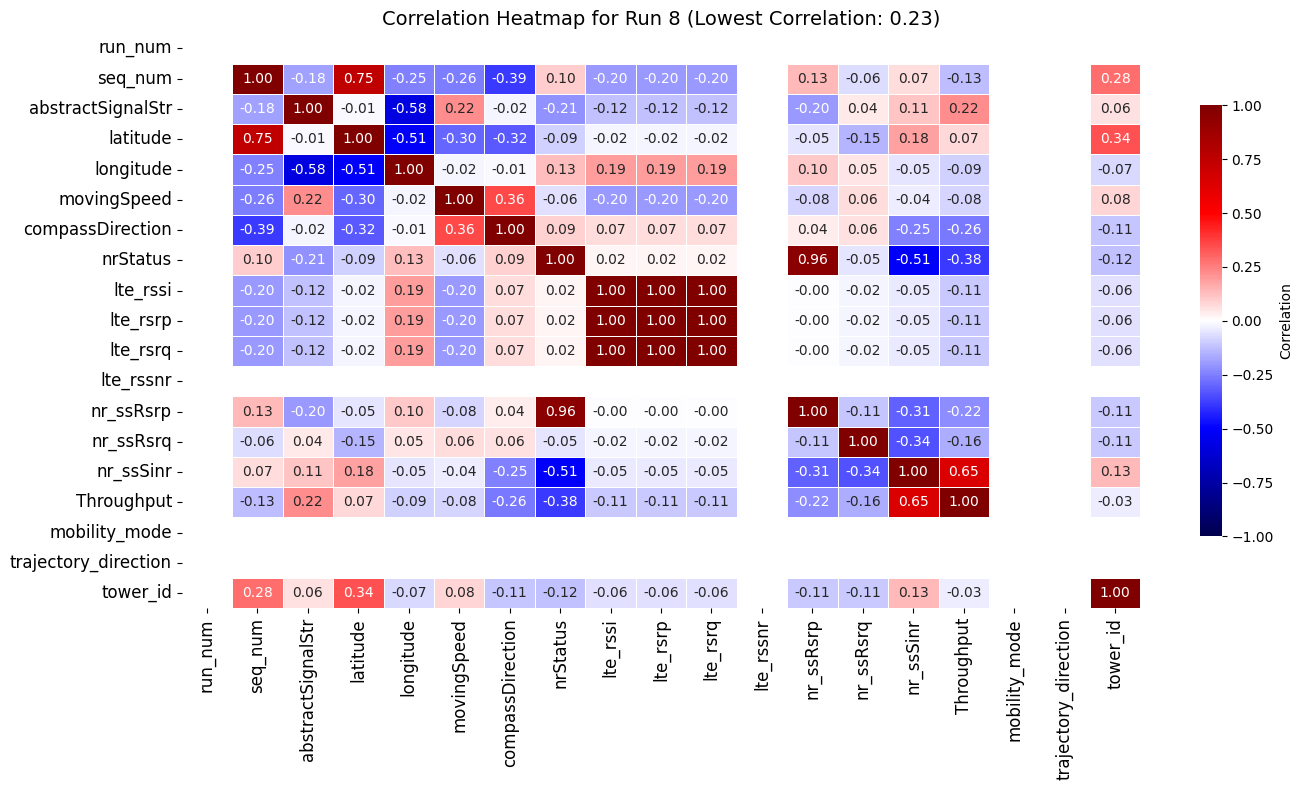

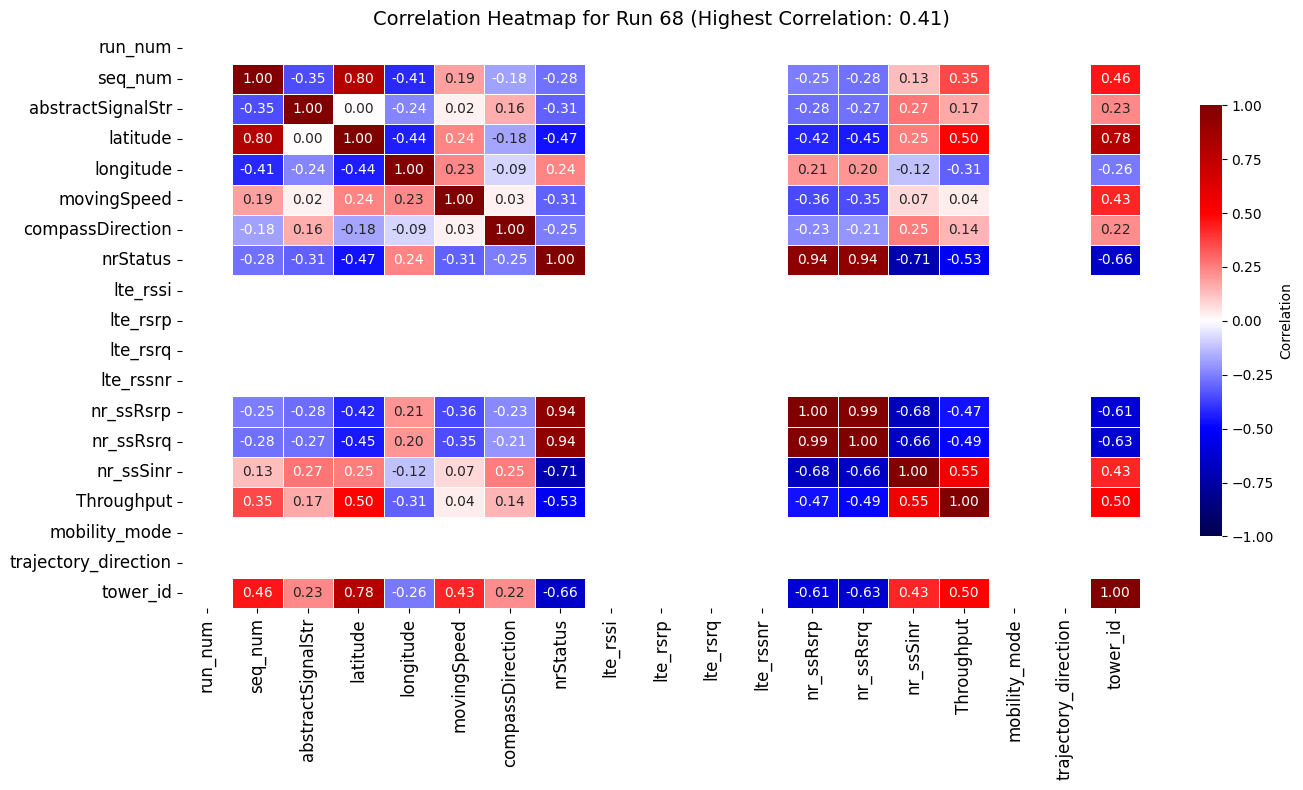

(np.int64(8), np.int64(68))

In [15]:
# Compute correlation matrices for all runs
run_correlation_matrices = {}

# Iterate over unique runs and compute correlation matrix
for run in dataset['run_num'].unique():
    df_run = dataset[dataset['run_num'] == run].select_dtypes(include=['number'])
    if not df_run.empty:
        run_correlation_matrices[run] = df_run.corr()

# Compute the mean correlation values for each run to identify the most different ones
run_mean_correlations = {
    run: np.abs(corr_matrix).mean().mean() for run, corr_matrix in run_correlation_matrices.items()
}

# Select the two runs with the most different mean correlation values
sorted_runs = sorted(run_mean_correlations.items(), key=lambda x: x[1])
low_correlation_run = sorted_runs[0][0]  # Run with the lowest mean correlation
high_correlation_run = sorted_runs[-1][0]  # Run with the highest mean correlation

# Function to plot a heatmap with enhanced readability and vertical X-axis labels
def plot_correlation_heatmap(corr_matrix, run_number, correlation_value, title_suffix):
    plt.figure(figsize=(14, 8))
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap="seismic",
        fmt=".2f",
        linewidths=0.5,
        vmin=-1, vmax=1,
        cbar_kws={"shrink": 0.75, "label": "Correlation"},
        annot_kws={"size": 10}
    )
    plt.xticks(rotation=90, ha="center", fontsize=12)  # Make X-axis labels vertical
    plt.yticks(fontsize=12)
    plt.title(f"Correlation Heatmap for Run {run_number} ({title_suffix} Correlation: {correlation_value:.2f})", fontsize=14)
    plt.tight_layout()
    plt.show()

# Plot correlation heatmap for the low-correlation run
plot_correlation_heatmap(run_correlation_matrices[low_correlation_run], low_correlation_run, run_mean_correlations[low_correlation_run], "Lowest")

# Plot correlation heatmap for the high-correlation run
plot_correlation_heatmap(run_correlation_matrices[high_correlation_run], high_correlation_run, run_mean_correlations[high_correlation_run], "Highest")

# Return the two selected runs
low_correlation_run, high_correlation_run


  Correlation varies significantly across runs, reinforcing that throughput is not always directly linked to signal strength.
 
 
 Mobility, interference, and congestion can weaken correlations, leading to unpredictable throughput patterns.



## Viewing impact of various exegenous parameters on Throughput


In [19]:
 


feature_columns = ["latitude", "longitude", "movingSpeed", "compassDirection",
                   "lte_rssi", "lte_rsrp", "lte_rsrq", "lte_rssnr",
                   "nr_ssRsrp", "nr_ssRsrq", "nr_ssSinr", "nrStatus",
                   "mobility_mode", "trajectory_direction"]

# Initialize a dictionary to store cumulative feature importances
feature_importance_sum = {feature: 0 for feature in feature_columns}
num_runs = len(dataset["run_num"].unique())  # Count total runs

# Loop through each unique run and compute feature importance
unique_runs = dataset["run_num"].unique()

for run in unique_runs:
    print(f"\n=== Training Model for Run {run} ===")
    
    # Filter dataset for a specific run
    run_data = dataset[dataset["run_num"] == run]
    
    # Prepare features and target
    X_run = run_data[feature_columns]
    y_run = run_data["Throughput"]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_run, y_run, test_size=0.2, random_state=42)
    
    # Train Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Evaluate model
    y_pred = rf_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Get feature importances
    feature_importances = rf_model.feature_importances_
    importance_df = pd.DataFrame({"Feature": feature_columns, "Importance": feature_importances})
    importance_df = importance_df.sort_values(by="Importance", ascending=False)
    
    # Accumulate feature importances for averaging
    for feature, importance in zip(feature_columns, feature_importances):
        feature_importance_sum[feature] += importance
    
    # Print results for this run
    print(importance_df.to_string(index=False))
    print(f"R² Score for Run {run}: {r2:.4f}")

# Compute the average importance for each feature across all runs
average_feature_importance = {feature: importance / num_runs for feature, importance in feature_importance_sum.items()}

# Convert to DataFrame for better visualization
average_importance_df = pd.DataFrame.from_dict(average_feature_importance, orient="index", columns=["Average Importance"])
average_importance_df = average_importance_df.sort_values(by="Average Importance", ascending=False)

# Display the average feature importance
print("\n=== Average Feature Importance Across All Runs ===")
print(average_importance_df.to_string(index=True))

# Conclusion on why all features should be used
print("\n📌 **Conclusion:**")
print("- The **average importance scores** show that multiple parameters impact throughput.")
print("- Some features (e.g., signal strength metrics like `nr_ssRsrp`, `lte_rsrp`) are more important, but movement and location also matter.")
print("- Ignoring any feature might reduce model accuracy, so **we should consider all parameters** to capture the full dynamics affecting throughput.")


=== Training Model for Run 1 ===
             Feature  Importance
            latitude    0.521653
           nr_ssSinr    0.317276
           longitude    0.043366
         movingSpeed    0.037307
           nr_ssRsrp    0.027494
            lte_rsrq    0.021815
    compassDirection    0.017162
            lte_rsrp    0.010956
            nrStatus    0.001796
            lte_rssi    0.000722
           nr_ssRsrq    0.000452
           lte_rssnr    0.000000
       mobility_mode    0.000000
trajectory_direction    0.000000
R² Score for Run 1: 0.8176

=== Training Model for Run 2 ===
             Feature  Importance
           longitude    0.516872
           nr_ssSinr    0.304706
         movingSpeed    0.067677
            latitude    0.044167
    compassDirection    0.030042
           nr_ssRsrp    0.025573
            lte_rsrq    0.005158
            nrStatus    0.001817
            lte_rssi    0.001740
            lte_rsrp    0.001467
           nr_ssRsrq    0.000781
           lte

## Throughput analysis for time series inference : 

In [20]:
# Load the dataset without setting an index
dataset = pd.read_csv(file_path, index_col=['run_num', 'seq_num'])
dataset=dataset[["Throughput"]]
dataset.head() 

Throughput
run_num seq_num            
1       1.0              78
        2.0             117
        3.0             110
        4.0             108
        5.0             100

### Throughput scaling for better visualisation and accuracy

In [21]:

dataset=(dataset-dataset.min())/(dataset.max()-dataset.min())
dataset.head(5)

Throughput
run_num seq_num            
1       1.0        0.040625
        2.0        0.060937
        3.0        0.057292
        4.0        0.056250
        5.0        0.052083

### Generating Input-Output Sequences for Multistep Time Series Forecasting Using a Sliding Window

In [22]:
# split function into sequences
def multistep_split(seq, n_steps_in, n_steps_out):
    X = list()
    y = list()
    for i in range(len(seq)):
        # pattern end
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(seq):
            break
        seq_x = seq[i:end_ix]
        seq_y = seq[end_ix:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

### Splitting Time Series Runs into Multistep Sequences for Forecasting

In [23]:
# separately splits runs into sequences
run_max=dataset.index.max()[0]
seconds_in = 20
seconds_out = 20 
X_list = list()
y_list = list()
for run_num in range(1, run_max+1):
    run = dataset.loc[run_num].values
    X, y = multistep_split(run.astype('float32'), n_steps_in=seconds_in, n_steps_out=seconds_out)
    X_list.append(X)
    y_list.append(y)
X = np.concatenate(X_list)
y = np.concatenate(y_list)
print(X.shape)
print(y.shape)

(63516, 20, 1)
(63516, 20)


explanation : 
X has a shape of (number of samples, 20, 1) because you're using 20 time steps as input for each sequence, and each timestep has one feature(throughput).
y has a shape of (number of samples, 20) because you're forecasting 20 future time steps.

In [26]:
# reshape into 2D
X = X.reshape((X.shape[0], X.shape[1]))
X.shape
print(y.shape)

(63516, 20)


## Sample test train split

In [32]:
ratio=0.8
train_size = int(ratio*X.shape[0])
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50812, 20)
(50812, 20)
(12704, 20)
(12704, 20)


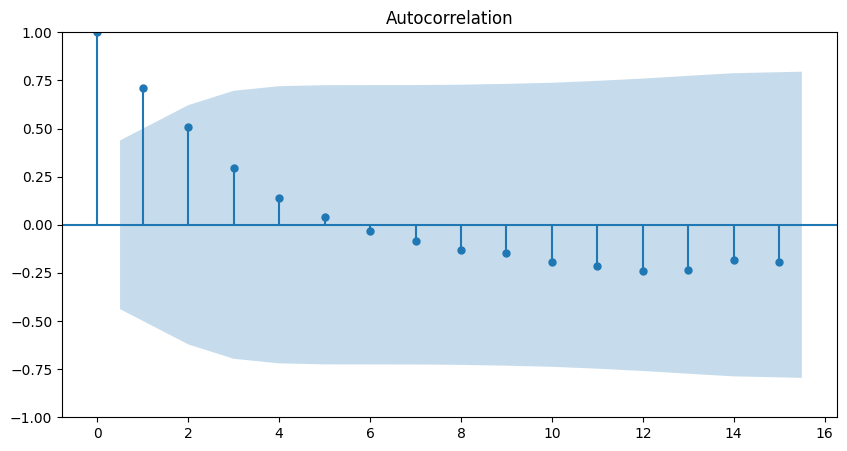

In [47]:
n = 5 # example number
x = X_test[n]
# plot acf
fig, ax = plt.subplots(figsize=(10, 5))
sm.graphics.tsa.plot_acf(x, lags=15, ax=ax)
plt.show()

The Autocorrelation Function (ACF) plot of our throughput data shows how the data points are correlated with their past values (lags).

Lag 0 always shows perfect correlation (1), and correlations drop significantly at lag 1 and lag 2, suggesting short-term dependencies.
After lag 2, correlations quickly diminish, indicating that past values don't strongly influence future throughput.
The shaded region shows the confidence intervals, and values within this area are not statistically significant, meaning the correlation after lag 2 is likely due to randomness.

In conclusion, we are going to start our modelling with a multivariant time series forecating models with a lag of 2 , and adjust our parameters accordly based on the evaluation metrics to choose the most suitable model 

In [35]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate

# 📌 Charger le dataset
file_path = 'C:/Users/axxiv/Desktop/mm-5G.csv'  # Assure-toi que le fichier existe
dataset_original = pd.read_csv(file_path, sep=',')

# 📌 Afficher les 5 premières lignes du dataset original sous forme de tableau
print("\n🔹 Dataset Original (avant encodage et normalisation) :")
print(tabulate(dataset_original.head(), headers='keys', tablefmt='fancy_grid'))

# 📌 Encoder les colonnes catégoriques
dataset = dataset_original.copy()  # Faire une copie pour le traitement

# 📌 Remplacer les valeurs manquantes par 0
dataset.fillna(0, inplace=True)

# 1️⃣ Encoder 'trajectory_direction'
enc = preprocessing.LabelEncoder()
dataset['trajectory_direction'] = enc.fit_transform(dataset['trajectory_direction'].astype(str))

# 2️⃣ Encoder 'mobility_mode'
enc = preprocessing.LabelEncoder()
dataset['mobility_mode'] = enc.fit_transform(dataset['mobility_mode'].astype(str))

# 3️⃣ Encoder 'nrStatus'
enc = preprocessing.LabelEncoder()
dataset['nrStatus'] = enc.fit_transform(dataset['nrStatus'].astype(str))

# 📌 Remplacer les valeurs manquantes par 0
dataset.fillna(0, inplace=True)

# 📌 Appliquer la Normalisation (MinMaxScaler pour mettre entre 0 et 1)
scaler = MinMaxScaler()

# Identifier les colonnes numériques (exclure les colonnes catégoriques déjà encodées)
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])

# 📌 Afficher les 5 premières lignes du dataset traité sous forme de tableau stylisé
print("\n🔹 Dataset Traité (après encodage et normalisation entre 0 et 1) :")
print(tabulate(dataset.head(), headers='keys', tablefmt='fancy_grid'))

# 📌 Sauvegarder le dataset traité
processed_file_path = 'C:/Users/axxiv/Desktop/mm-5G-processed.csv'
dataset.to_csv(processed_file_path, index=False)
print(f"\n✅ Dataset traité sauvegardé sous '{processed_file_path}'")



🔹 Dataset Original (avant encodage et normalisation) :
╒════╤═══════════╤═══════════╤═════════════════════╤════════════╤═════════════╤═══════════════╤════════════════════╤════════════════╤════════════╤════════════╤════════════╤═════════════╤═════════════╤═════════════╤═════════════╤══════════════╤═════════════════╤════════════════════════╤════════════╕
│    │   run_num │   seq_num │   abstractSignalStr │   latitude │   longitude │   movingSpeed │   compassDirection │ nrStatus       │   lte_rssi │   lte_rsrp │   lte_rsrq │   lte_rssnr │   nr_ssRsrp │   nr_ssRsrq │   nr_ssSinr │   Throughput │ mobility_mode   │ trajectory_direction   │   tower_id │
╞════╪═══════════╪═══════════╪═════════════════════╪════════════╪═════════════╪═══════════════╪════════════════════╪════════════════╪════════════╪════════════╪════════════╪═════════════╪═════════════╪═════════════╪═════════════╪══════════════╪═════════════════╪════════════════════════╪════════════╡
│  0 │         1 │         1 │              